In [145]:
import os
import pandas as pd

import matplotlib.pyplot as plt

In [198]:
def show_data(submissions, num_bins):
    healthy = submissions["healthy"]
    multiple_diseases = submissions["multiple_diseases"]
    rust = submissions["rust"]
    scab = submissions["scab"]
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot(2, 2, 1)
    plt.hist(healthy, num_bins, density=1)
    ax2 = plt.subplot(2, 2, 2)
    plt.hist(multiple_diseases, num_bins, density=1)
    ax3 = plt.subplot(2, 2, 3)
    plt.hist(rust, num_bins, density=1)
    ax4 = plt.subplot(2, 2, 4)
    plt.hist(scab, num_bins, density=1)
    ax1.set_title("healthy")
    ax2.set_title("multiple_diseases")
    ax3.set_title("rust")
    ax4.set_title("scab")
    
    plt.show()
    
def embedding(path_root):
    embeds = pd.read_csv("../../input/plant-pathology-2020-fgvc7/sample_submission.csv")
    total_weight = 0.0
    for pred_file in os.listdir(path_root):
        if "csv" not in pred_file:
            continue
        weight = float(pred_file.split('_')[-1][:5])
        print("weight: ", weight)
        pred_file = os.path.join(path_root, pred_file)
        preds = pd.read_csv(pred_file)
        embeds.healthy += preds.healthy * weight
        embeds.multiple_diseases += preds.multiple_diseases * weight
        embeds.rust += preds.rust * weight
        embeds.scab += preds.scab * weight
        total_weight += weight
    embeds.healthy /= total_weight
    embeds.multiple_diseases /= total_weight
    embeds.rust /= total_weight
    embeds.scab /= total_weight
    print("total_weight: ", total_weight)
    return embeds

## Embedding 1: 6models - 0.983

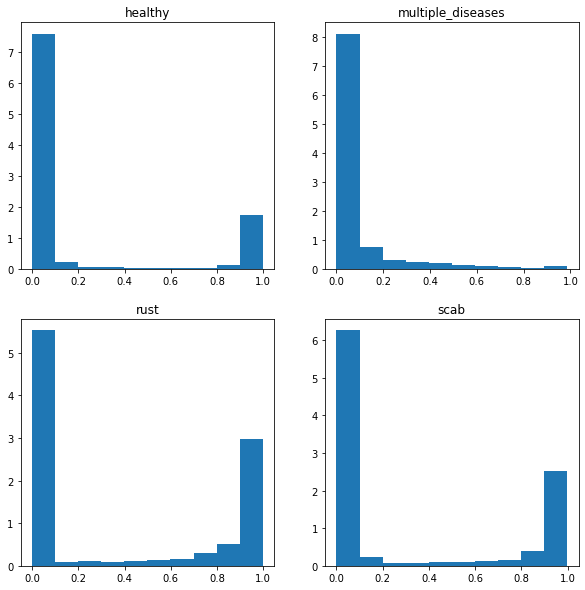

In [123]:
path_root = "./FGVC2020/embeding1_0.983"
notebook_981 = pd.read_csv(os.path.join(path_root, "notebook_0.981.csv"))
notebook_977 = pd.read_csv(os.path.join(path_root, "notebook_0.977.csv"))
notebook_979 = pd.read_csv(os.path.join(path_root, "notebook_0.979.csv"))

pytorch_resnet_970 = pd.read_csv(os.path.join(path_root, "pytorch_resnet18_0.983_0.970.csv"))
inception_resnet_v2_977 = pd.read_csv(os.path.join(path_root, "inception_resnet_v2_class_balance_31__augment_embedding_977.csv"))
efficientnet_b6_975 = pd.read_csv(os.path.join(path_root, "efficientnet_b6_aug3_30_focal_loss_0.975.csv"))

sub = pd.read_csv("../../input/plant-pathology-2020-fgvc7/sample_submission.csv")

sub.healthy = (notebook_981.healthy + notebook_979.healthy + notebook_977.healthy + pytorch_resnet_970.healthy + inception_resnet_v2_977.healthy + efficientnet_b6_975.healthy) / 6
sub.multiple_diseases = (notebook_981.multiple_diseases + notebook_979.multiple_diseases + notebook_977.multiple_diseases + pytorch_resnet_970.multiple_diseases + inception_resnet_v2_977.multiple_diseases + efficientnet_b6_975.multiple_diseases) / 6
sub.rust = (notebook_981.rust + notebook_979.rust + notebook_977.rust + pytorch_resnet_970.rust + inception_resnet_v2_977.rust + efficientnet_b6_975.rust) / 6
sub.scab = (notebook_981.scab + notebook_979.scab + notebook_977.scab + pytorch_resnet_970.scab + inception_resnet_v2_977.scab + efficientnet_b6_975.scab) / 6
sub.to_csv("embeddings_6_models.csv", index=False)
show_data(sub, 10)

In [137]:
ml1 = notebook_981[notebook_981["multiple_diseases"] > 0.8]
ml2 = notebook_977[notebook_977["multiple_diseases"] > 0.8]

In [143]:
ml1["image_id"]
ml2["image_id"]

54        Test_54
168      Test_168
211      Test_211
282      Test_282
358      Test_358
395      Test_395
506      Test_506
520      Test_520
557      Test_557
713      Test_713
714      Test_714
727      Test_727
733      Test_733
806      Test_806
807      Test_807
921      Test_921
932      Test_932
987      Test_987
991      Test_991
1158    Test_1158
1204    Test_1204
1348    Test_1348
1375    Test_1375
1379    Test_1379
1380    Test_1380
1440    Test_1440
1590    Test_1590
1613    Test_1613
1627    Test_1627
1634    Test_1634
1728    Test_1728
1801    Test_1801
Name: image_id, dtype: object

## Embedding 2: 14models - 0.980

total:  14


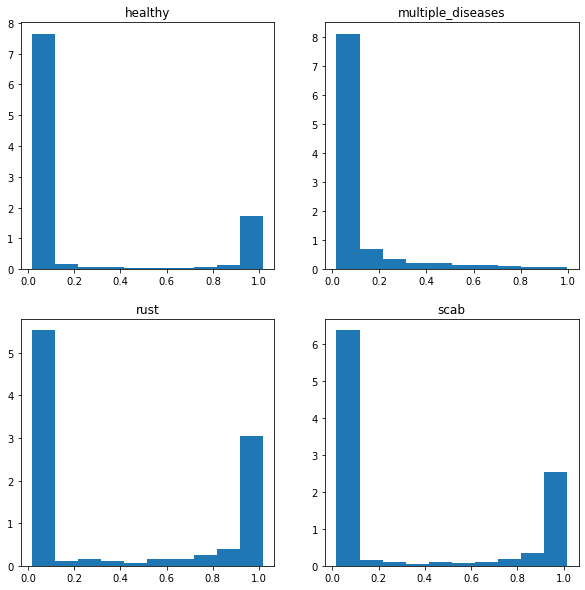

In [115]:
path_root = "./FGVC2020/embedding2_0.980"
embeds = embedding(path_root)
embeds.to_csv("embeddings_14_models.csv", index=False)
show_data(embeds, 10)

## Embedding 3: 8models - 0.983

weight:  0.979
weight:  0.977
weight:  0.981
weight:  0.977
weight:  0.975
weight:  0.978
weight:  0.981
weight:  0.977
total_weight:  7.824999999999999


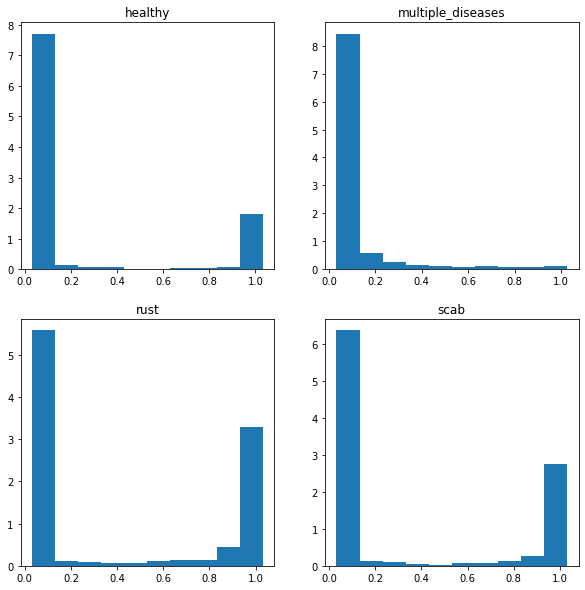

In [160]:
path_root = "./FGVC2020/embedding3_0.983"
embeds = embedding(path_root)
embeds.to_csv("embeddings3_8_models.csv", index=False)
show_data(embeds, 10)

## Embedding 4: 10models - 0.983

weight:  0.979
weight:  0.977
weight:  0.981
weight:  0.977
weight:  0.975
weight:  0.978
weight:  0.979
weight:  0.975
weight:  0.981
weight:  0.977
total_weight:  9.779


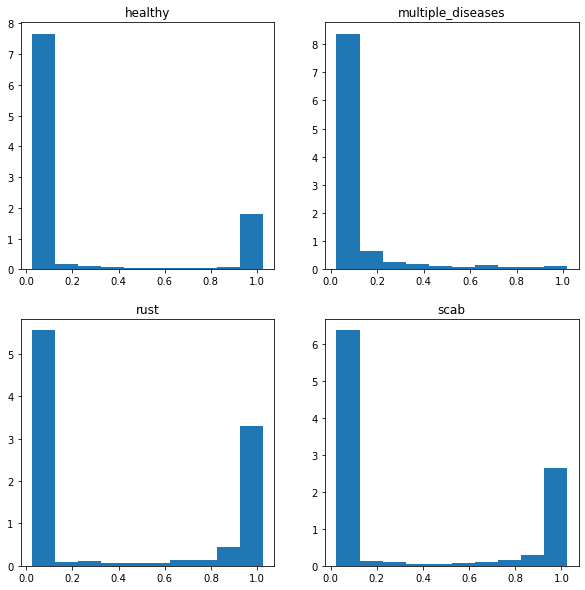

In [161]:
path_root = "./FGVC2020/embedding4"
embeds = embedding(path_root)
embeds.to_csv("embeddings4_10_models.csv", index=False)
show_data(embeds, 10)

## Embedding 5: 5models-0.981

weight:  0.979
weight:  0.981
weight:  0.978
weight:  0.979
weight:  0.981
total_weight:  4.898


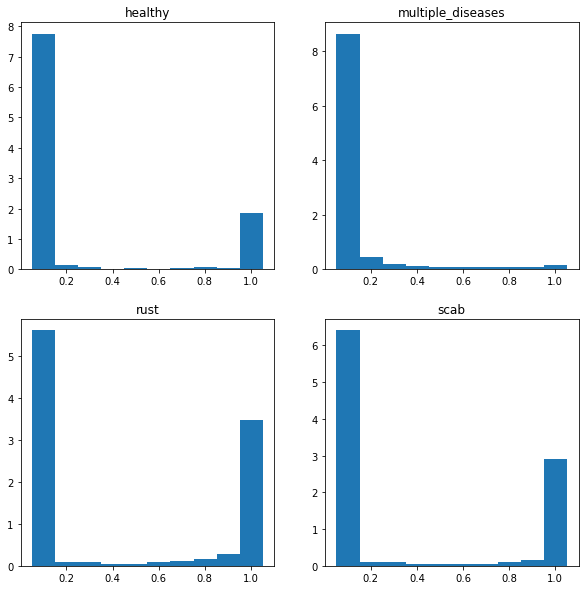

In [167]:
path_root = "./FGVC2020/embedding5_0.981"
embeds = embedding(path_root)
embeds.to_csv("embeddings5_5_models.csv", index=False)
show_data(embeds, 10)

## Embedding 6: 12models

In [203]:
path_root = "./FGVC2020/embeding6"
embeds = embedding(path_root)
embeds.to_csv("embeddings6_13_models_large_gap.csv", index=False)
show_data(embeds, 10)

FileNotFoundError: [Errno 2] No such file or directory: './FGVC2020/embeding6'

## Embedding 7:

weight:  0.977
weight:  0.982
weight:  0.979
weight:  0.978
weight:  0.977
weight:  0.975
weight:  0.981
weight:  0.977
weight:  0.975
weight:  0.98
weight:  0.978
weight:  0.981
weight:  0.977
total_weight:  12.717


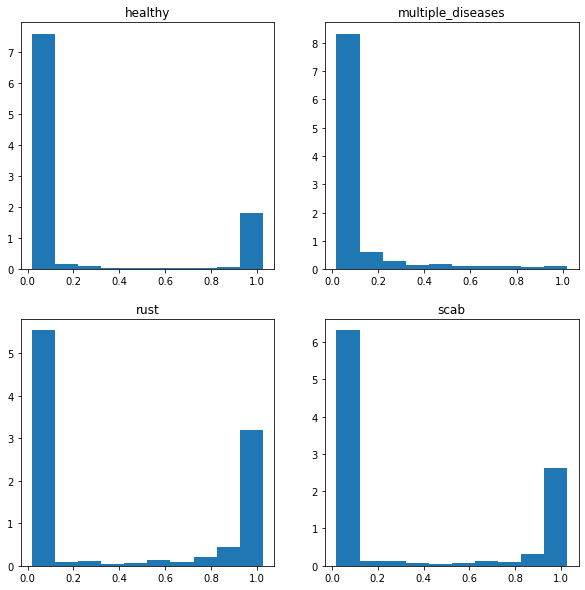

In [204]:
path_root = "./FGVC2020/embedding7"
embeds = embedding(path_root)
embeds.to_csv("embeddings7_weight.csv", index=False)
show_data(embeds, 10)

In [220]:
def LabelSmoothing(encodings , alpha=0.01):
    y_ls = (1 - alpha) * encodings + alpha / 4
    return y_ls

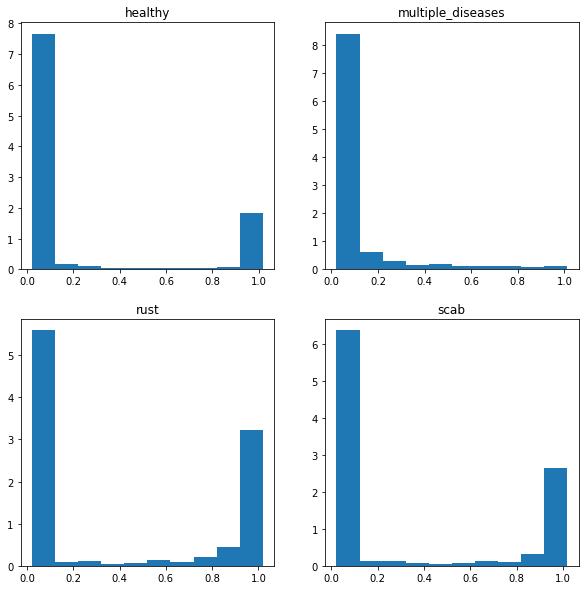

In [222]:
csv_path = "./embeddings7_weight.csv"
sub = pd.read_csv(csv_path)
sub.healthy = LabelSmoothing(sub.healthy)
sub.multiple_diseases = LabelSmoothing(sub.multiple_diseases)
sub.rust = LabelSmoothing(sub.rust)
sub.scab = LabelSmoothing(sub.scab)
sub.to_csv("embeddings7_weight_label_smooth.csv", index=False)
show_data(sub, 10)

In [223]:
sub.healthy

0       0.022807
1       0.022180
2       0.022504
3       1.013969
4       0.024065
          ...   
1816    0.022058
1817    0.024152
1818    0.022567
1819    1.013908
1820    0.022328
Name: healthy, Length: 1821, dtype: float64